# DIMENSIONALITY REDUCTION

Many	Machine	Learning	problems	involve	thousands	or	even	millions	of	features	for	each	training instance.	Not	only	does	this	make	training	extremely	slow,	it	can	also	make	it	much	harder	to	find	a	good solution,	as	we	will	see.	This	problem	is	often	referred	to	as	the	curse	of	dimensionality. 

 by reducing the features we can speed up the training and can optimize good solution.this is called dimensionality reduction

Reducing	dimensionality	does	lose	some	information	(just	like	compressing	an	image	to	JPEG	can	degrade	its	quality),	so	even though	it	will	speed	up	training,	it	may	also	make	your	system	perform	slightly	worse.	It	also	makes	your	pipelines	a	bit	more complex	and	thus	harder	to	maintain.	So	you	should	first	try	to	train	your	system	with	the	original	data	before	considering	using dimensionality	reduction	if	training	is	too	slow.	In	some	cases,	however,	reducing	the	dimensionality	of	the	training	data	may	filter out	some	noise	and	unnecessary	details	and	thus	result	in	higher	performance	(but	in	general	it	won’t;	it	will	just	speed	up training).


Apart	from	speeding	up	training,	dimensionality	reduction	is	also	extremely	useful	for	data	visualization (or	DataViz).	Reducing	the	number	of	dimensions	down	to	two	(or	three)	makes	it	possible	to	plot	a	highdimensional	training	set	on	a	graph	and	often	gain	some	important	insights	by	visually	detecting	patterns, such	as	clusters. 

# The	Curse	of	Dimensionality

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\91949\\Desktop\\data science"
CHAPTER_ID = "unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Projection methods

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

PCA using SVD decomposition
Note: the svd() function returns U, s and Vt, where Vt is equal to $\mathbf{V}^T$, the transpose of the matrix $\mathbf{V}$. Earlier versions of the book mistakenly said that it returned V instead of Vt. Also, Equation 8-1 should actually contain $\mathbf{V}$ instead of $\mathbf{V}^T$, like this:

$
\mathbf{V} =
\begin{pmatrix}
  \mid &amp; \mid &amp; &amp; \mid \\
  \mathbf{c_1} &amp; \mathbf{c_2} &amp; \cdots &amp; \mathbf{c_n} \\
  \mid &amp; \mid &amp; &amp; \mid
\end{pmatrix}
$

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

# Main	Approaches	for	Dimensionality	Reduction 

projection	and	Manifold	Learning.

# Projection

1.if	we	project	every	training	instance	perpendicularly	onto	this subspace	(as	represented	by	the	short	lines	connecting	the	instances	to	the	plane),	we	get	the	new	2D dataset

# Manifold Learning

# PCA

1.Principal	Component	Analysis	(PCA)	is	by	far	the	most	popular	dimensionality	reduction	algorithm. First	it	identifies	the	hyperplane	that	lies	closest	to	the	data,	and	then	it	projects	the	data	onto	it.

2.Before	you	can	project	the	training	set	onto	a	lower-dimensional	hyperplane,	you	first	need	to	choose	the right	hyperplane

3.It	seems	reasonable	to	select	the	axis	that	preserves	the	maximum	amount	of	variance,	as	it	will	most likely	lose	less	information	than	the	other	projections.|

4.Another	way	to	justify	this	choice	is	that	it	is	the axis	that	minimizes	the	mean	squared	distance	between	the	original	dataset	and	its	projection	onto	that axis.	This	is	the	rather	simple	idea	behind	PCA

5.PCA	identifies	the	axis	that	accounts	for	the	largest	amount	of	variance	in	the	training	set.

6.identifies as many	axes	as	the	number	of	dimensions	in	the	dataset. 

7.The	unit	vector	that	defines	the	ith	axis	is	called	the	ith	principal	component	(PC).	

8.The	direction	of	the	principal	components	is	not	stable:	if	you	perturb	the	training	set	slightly	and	run	PCA	again,	some	of	the	new PCs	may	point	in	the	opposite	direction	of	the	original	PCs.	However,	they	will	generally	still	lie	on	the	same	axes.	In	some	cases, a	pair	of	PCs	may	even	rotate	or	swap,	but	the	plane	they	define	will	generally	remain	the	same

9.So	how	can	you	find	the	principal	components	of	a	training	set?	Luckily,	there	is	a	standard	matrix factorization	technique	called	Singular	Value	Decomposition	(SVD)	that	can	decompose	the	training	set matrix	X	into	the	dot	product	of	three	matrices	U	·	Σ	·	VT,	where	VT	contains	all	the	principal	components that	we	are	looking	

Note: the svd() function returns U, s and Vt, where Vt is equal to $\mathbf{V}^T$, the transpose of the matrix $\mathbf{V}$. Earlier versions of the book mistakenly said that it returned V instead of Vt. Also, Equation 8-1 should actually contain $\mathbf{V}$ instead of $\mathbf{V}^T$, like this:

$
\mathbf{V} =
\begin{pmatrix}
  \mid &amp; \mid &amp; &amp; \mid \\
  \mathbf{c_1} &amp; \mathbf{c_2} &amp; \cdots &amp; \mathbf{c_n} \\
  \mid &amp; \mid &amp; &amp; \mid
\end{pmatrix}
$

# PCA using SVD decomposition

In [18]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
#we got the principal components

PCA	assumes	that	the	dataset	is	centered	around	the	origin.	As	we	will	see,	Scikit-Learn’s	PCA	classes	take	care	of	centering the	data	for	you.	However,	if	you	implement	PCA	yourself	(as	in	the	preceding	example),	or	if	you	use	other	libraries,	don’t
forget	to	center	the	data	first.

Once	you	have	identified	all	the	principal	components,	you	can	reduce	the	dimensionality	of	the	dataset down	to	d	dimensions	by	projecting	it	onto	the	hyperplane	defined	by	the	first	d	principal	components. 

To	project	the	training	set	onto	the	hyperplane,	you	can	simply	compute	the	dot	product	of	the	training	set matrix	X	by	the	matrix	Wd,	defined	as	the	matrix	containing	the	first	d	principal	components	(i.e.,	the matrix	composed	of	the	first	d	columns	of	VT)

Xd=X.Wd
#X=training set
#Xd = projecting the training set to d dimensions
#Wd= the matrix containg first d principal components

In [20]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [21]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [22]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [23]:
X2D_using_svd = X2D

# Using	Scikit-Learn 

1.Scikit-Learn’s	PCA	class	implements	PCA	using	SVD	decomposition	just	like	we	did	before.	The following	code	applies	PCA	to	reduce	the	dimensionality	of	the	dataset	down	to	two	dimensions

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

2.After	fitting	the	PCA	transformer	to	the	dataset,	you	can	access	the	principal	components	using	the components_	variable

In [30]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [31]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

X2D AND X2D USING SVD ARE SAME

In [37]:
#by using ALLCLOSE we can find wheter two values are equal or not
np.allclose(X2D, -X2D_using_svd)

True

In [38]:
#pricipal components
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

# Explained	Variance	Ratio 

Another	very	useful	piece	of	information	is	the	explained	variance	ratio	of	each	principal	component, available	via	the	explained_variance_ratio_	variable.	It	indicates	the	proportion	of	the	dataset’s variance	that	lies	along	the	axis	of	each	principal	component

In [39]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This	tells	you	that	84.2%	of	the	dataset’s	variance	lies	along	the	first	axis,	and	14.6%	lies	along	the second	axis.	This	leaves	less	than	1.2%	for	the	third	axis,	so	it	is	reasonable	to	assume	that	it	probably carries	little	information

# Choosing	the	Right	Number	of	Dimensions 

The	following	code	computes	PCA	without	reducing	dimensionality,	then	computes	the	minimum	number of	dimensions	required	to	preserve	95%	of	the	training	set’s	variance:


In [52]:
pca=PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

You	could	then	set	n_components=d	and	run	PCA	again.	However,	there	is	a	much	better	option:	instead of	specifying	the	number	of	principal	components	you	want	to	preserve,	you	can	set	n_components	to	be a	float	between	0.0	and	1.0,	indicating	the	ratio	of	variance	you	wish	to	preserve:


In [53]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X)

Yet	another	option	is	to	plot	the	explained	variance	as	a	function	of	the	number	of	dimensions	(simply	plot cumsum;	see	Figure	8-8).	There	will	usually	be	an	elbow	in	the	curve,	where	the	explained	variance	stops growing	fast.	

[0, 200, 0, 1]

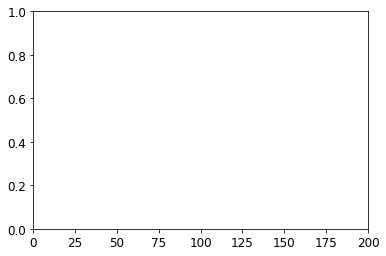

In [78]:
a=pca.explained_variance_ratio_
plt.plot(y=a,x=d)
plt.axis([0,200,0,1])


# PCA	for	Compression 

In [70]:
from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [71]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [72]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [73]:
d

154

In [74]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [76]:
pca.n_components_

154

In [79]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557437

The	mean	squared	distance	between	the	original	data	and	the	reconstructed	data (compressed	and	then	decompressed)	is	called	the	reconstruction	error

the	following	code compresses	the	MNIST	dataset	down	to	154	dimensions,	then	uses	the	inverse_transform()	method	to decompress	it	back	to	784	dimensions.

In [80]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [81]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


Saving figure mnist_compression_plot


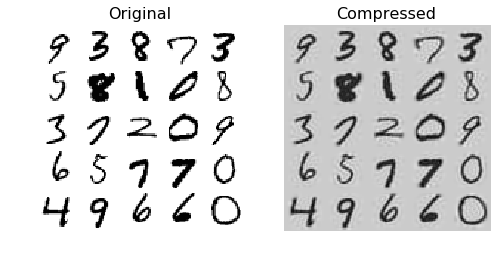

In [83]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

In [84]:
X_reduced_pca = X_reduced

# Incremental PCA

One	problem	with	the	preceding	implementation	of	PCA	is	that	it	requires	the	whole	training	set	to	fit	in memory	in	order	for	the	SVD	algorithm	to	run.	Fortunately,	Incremental	PCA	(IPCA)	algorithms	have been	developed:	you	can	split	the	training	set	into	mini-batches	and	feed	an	IPCA	algorithm	one	minibatch	at	a	time.	This	is	useful	for	large	training	sets,	and	also	to	apply	PCA	online

The	following	code	splits	the	MNIST	dataset	into	100	mini-batches	(using	NumPy’s	array_split() function)	and	feeds	them	to	Scikit-Learn’s	IncrementalPCA	class5	to	reduce	the	dimensionality	of	the MNIST	dataset	down	to	154	dimensions	(just	like	before).	Note	that	you	must	call	the	partial_fit() method	with	each	mini-batch	rather	than	the	fit()	method	with	the	whole	training	set:

In [87]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [ ]:
X_recovered_inc_pca=inc_pca.inverse_transform(X_reduced)


NameError: name 'X_recovered_inc_pca' is not defined

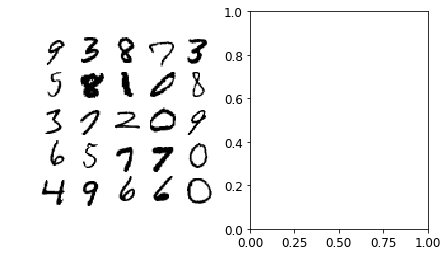

In [89]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()
